IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE

In [82]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


The goal of this Quest is to do a one step ahead forecast of the Miles Traveled data.
## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv". Figure out how to set the date to a datetime index columns

In [83]:
# Load dataset and set app name as index
path = "https://raw.githubusercontent.com/crajapax/GDAtrack3b/main/Miles_Traveled.csv"


In [84]:
# En supposant que df est votre DataFrame original
from datetime import datetime

# df=df_original.copy()
# Convertir l'index en datetime si ce n'est pas déjà le cas
df.DATE = pd.to_datetime(df.DATE)
#  colonne date en index
df.set_index('DATE', inplace=True)


In [85]:
# df = pd.read_csv(path)
# df.index = pd.to_datetime(df.index)
# df


In [87]:
#set the date as the index of our dataframe, ie. each of our datapoints correspond to a date
# df.set_index('DATE')
# data.set_index('DATE',parse_dates=True)
df.index.asfreq = 'MS'


In [89]:
df


,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 588 entries, 1970-01-01 to 2018-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   588 non-null    float64
dtypes: float64(1)
memory usage: 9.2 KB


**Task: Change the column names to Value**

In [90]:
# CODE HERE
df.rename(columns={'TRFVOLUSM227NFWA': 'Value'}, inplace=True)



In [91]:
df


,Value
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0
...,...
2018-08-01,286608.0
2018-09-01,260595.0
2018-10-01,282174.0


**TASK: Plot out the time series**

<Axes: xlabel='DATE'>

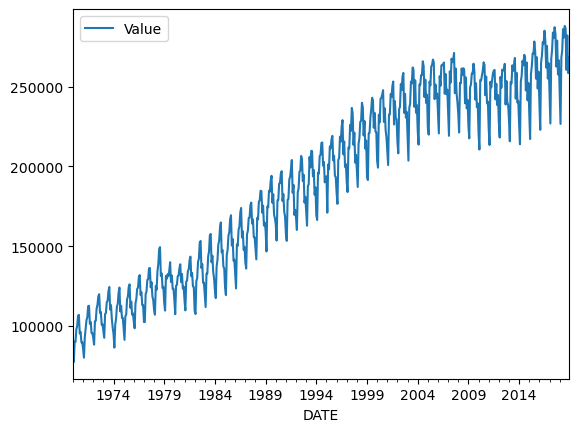

In [92]:
# CODE HERE
df.plot()


**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

<Figure size 1200x800 with 0 Axes>

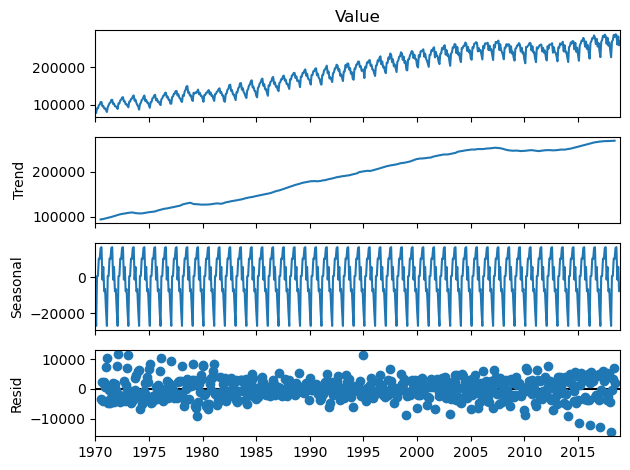

In [93]:
# CODE HERE
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has a DateTime index
# and a column named 'Value' for the time series data.

# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Value'], model='additive')

# Plot the seasonal decomposition
plt.figure(figsize=(12,8))
fig = decomposition.plot()
plt.show()


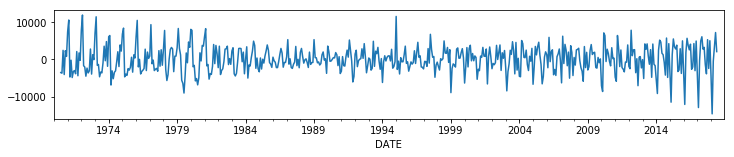

## Train Test Split

**TASK: Figure out the length of the data set**

In [ ]:
df.shape


(588, 1)

In [ ]:
# import pandas as pd


# # indice de séparation pour 80% des données pour l'entraînement
# split_index = int(len(df) * 0.8)

# # Diviser le jeu de données
# train_df = df.iloc[:split_index]
# test_df = df.iloc[split_index:]

# # Si vous voulez spécifiquement que le test commence à partir du '1990-12-25', vous pouvez filtrer comme ceci
# # Mais assurez-vous que la date '1990-12-25' est dans le format approprié de votre index.
# # test_df = df[df.index >= pd.to_datetime('1990-12-25')]

# # Enregistrer dans des fichiers CSV
# train_df.to_csv('datas/train_miles_traveled_set.csv', encoding='utf-8')
# test_df.to_csv('datas/test_miles_traveled_set.csv', encoding='utf-8')

# # Si vous avez besoin de X_train, y_train (par exemple, X pour les dates, y pour les valeurs), vous pourriez faire comme suit :
# # Pour cet exemple, je suppose que 'Value' est la colonne que vous souhaitez prédire.
# X_train = train_df.drop('Value', axis=1)  # ou la colonne que vous souhaitez exclure
# y_train = train_df['Value']


588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [94]:
# CODE HERE
import pandas as pd

# Trouver la date de coupure pour les 12 derniers mois
cutoff_date = df.index.max() - pd.DateOffset(months=12)

# Créer les ensembles d'entraînement et de test
train_df = df[df.index <= cutoff_date]
test_df = df[df.index > cutoff_date]

# Vous pouvez maintenant enregistrer ces DataFrames dans des fichiers CSV si nécessaire
train_df.to_csv('datas/train_miles_traveled_set.csv', index=True)
test_df.to_csv('datas/test_miles_traveled_set.csv', index=True)


In [95]:
len(test_df)


12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

MinMaxScaler(copy=True, feature_range=(0, 1))

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [96]:
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler)
X_train

scaler=MinMaxScaler(feature_range=(0,1))

# Ajustement du scaler sur les données d'entraînement
# .values.reshape(-1, 1) est utilisé pour transformer le DataFrame en un format approprié pour le scaler (n_samples, n_features)
scaler.fit(train_df.values.reshape(-1, 1))

# Transformation des ensembles d'entraînement et de test
train_scaled = scaler.transform(train_df.values.reshape(-1, 1))
test_scaled = scaler.transform(test_df.values.reshape(-1, 1))

# Conversion des données mises à l'échelle en DataFrame pour une utilisation ultérieure
train_scaled_df = pd.DataFrame(train_scaled, index=train_df.index, columns=train_df.columns)
test_scaled_df = pd.DataFrame(test_scaled, index=test_df.index, columns=test_df.columns)


# Time Series Generator

We Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12. n_input refers to the window size, ie. length of your sequence.
We want to do a one step ahead forecast.

In [99]:
from keras.preprocessing.sequence import TimeseriesGenerator


ModuleNotFoundError: No module named 'keras'

In [ ]:
n_input = 12 # you might need to test a variety of input values and test performance,
#but at least 12 to capture one cycle of seasonality

n_features=1 # for univariate time series always 1

# Create input data from time series with generator object
# we put in the train data 2, once as actual train data, once as target variable, specify window length =n_input
# smaller batch sizes tend to work better
# CAREFUL: adjust the following 'scaled_train' to the name of your train object
generator = TimeseriesGenerator(scaled_train, scaled_train, sampling_rate=1, length=n_input, batch_size=1)



Using TensorFlow backend.


TASK: inspect the output of the TimeSeriesGenerator

In [ ]:
# As result, we get a set of tuples (x, y) which we can enumerate and index
print('Length of the output is {}.'.format(len(generator)))

demo_x0 = generator[0][0]
demo_y0 = generator[0][1]




### Create the Model

Create a Keras Sequential Model with as many LSTM units as you want and a final Dense Layer.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [ ]:
# fit model
model.fit_generator(generator,epochs=30)


Epoch 1/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 2/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0011
Epoch 3/10
552/552 [==============================] - 16s 30ms/step - loss: 9.5115e-04
Epoch 4/10
552/552 [==============================] - 17s 30ms/step - loss: 8.8495e-04
Epoch 5/10
552/552 [==============================] - 17s 30ms/step - loss: 8.4229e-04
Epoch 6/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0012
Epoch 7/10
552/552 [==============================] - 17s 30ms/step - loss: 8.6496e-04
Epoch 8/10
552/552 [==============================] - 17s 30ms/step - loss: 7.5506e-04
Epoch 9/10
552/552 [==============================] - 17s 30ms/step - loss: 0.0010
Epoch 10/10
552/552 [==============================] - 16s 30ms/step - loss: 0.0010


**TASK: Plot the history of the loss that occured during training.**

In [ ]:
# CODE HERE


dict_keys(['loss'])

# Evaluate on Test Data

Based on your test data and input size, create an appropriately sized "first evaluation batch"

In [ ]:
first_eval_batch = scaled_train[-n_input:]


In [ ]:
first_eval_batch


array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [ ]:
# reshape the data to get it into the 3 dimensional shape needed for the keras model and model.predict()
# same dim as TimeSeriesGenerator output
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))


**TASK: predict the first point of the test dataset**

In [ ]:
# Code here


In [ ]:
#


## Now let's put this logic in a for loop to predict into the future for the entire test range.


**TASK: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [ ]:
# FORECAST USING RNN MODEL

 # list for holding predictions
test_predictions = []


# how far into feature will you foreacst (here just len test)
for i in range(len(test)):

    # get prediction 1 time stamp ahead of historical 12 points ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]

    # store that  prediction
    test_predictions.append(current_pred)

    # update current batch to now include prediction and drop first value
    # append current prediction and this is all teh code we need to forecast into the future, ie. into the testset
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions to retrieve back the original and not the scaled values**

In [ ]:
# invert scale to get back true predicted values!
#CODE HERE


array([[246787.65124869],
       [235267.94174141],
       [258981.00705367],
       [269320.52187717],
       [280305.23281485],
       [283555.27218211],
       [288203.31152987],
       [283559.36330348],
       [271973.99567699],
       [276999.53167695],
       [261872.87937891],
       [264047.44175631]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [ ]:
# CODE HERE


,Value,Predictions
DATE,,
2018-01-01,245695.0,246787.651249
2018-02-01,226660.0,235267.941741
2018-03-01,268480.0,258981.007054
2018-04-01,272475.0,269320.521877
2018-05-01,286164.0,280305.232815
2018-06-01,280877.0,283555.272182
2018-07-01,288145.0,288203.311530
2018-08-01,286608.0,283559.363303
2018-09-01,260595.0,271973.995677


**TASK: Plot out the test set against your own predicted values.**

In [ ]:
# CODE HERE


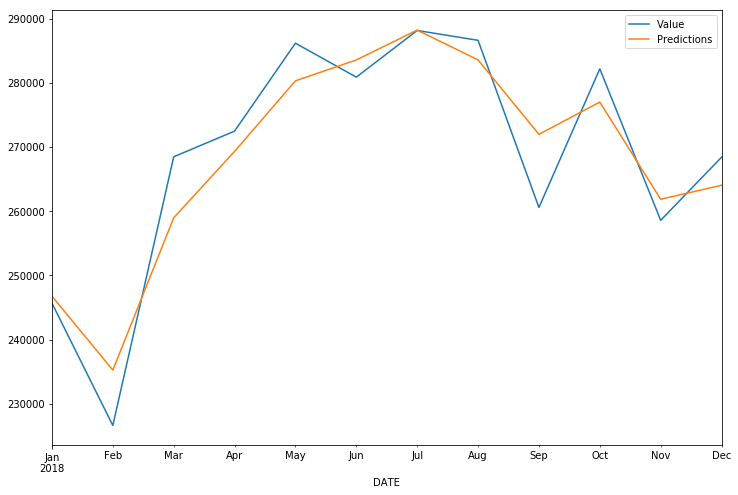

# Saving Models

**TASK: Optional, Save your model!**